In [1]:
from Prediction_tool import Predict
from PIL import Image
img = Image.open('./Rock19_1100_filtered.png')

In [2]:
import os
models = [k for k in os.listdir('./models') if k.endswith('.pth')]
models

['layered.pth',
 'sharp_edges.pth',
 'porous.pth',
 'solid.pth',
 'smooth_shape.pth',
 'best_model.pth']

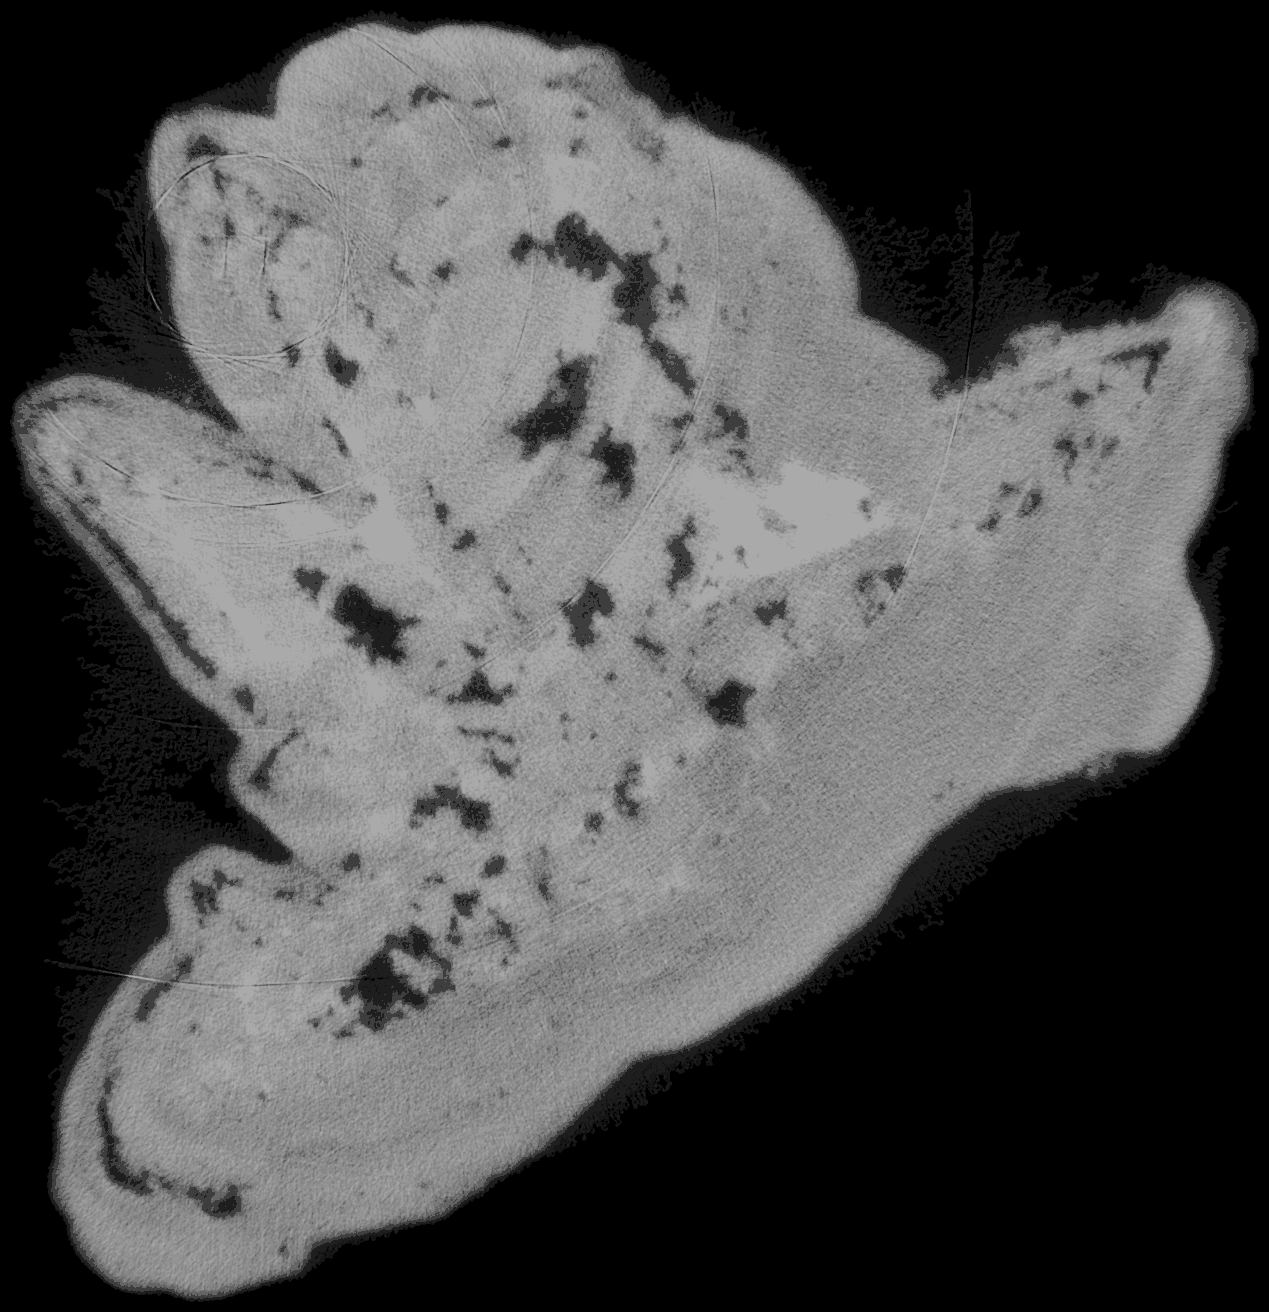

In [3]:
img

In [4]:
{0: 6,
 1: 9,
 2: 10,
 3: 11,
 4: 12,
 5: 16,
 6: 18,
 7: 19,
 8: 25,
 9: 27,
 10: 28,
 11: 30,
 12: 32,
 13: 35,
 14: 43,
 15: 51}

{0: 6,
 1: 9,
 2: 10,
 3: 11,
 4: 12,
 5: 16,
 6: 18,
 7: 19,
 8: 25,
 9: 27,
 10: 28,
 11: 30,
 12: 32,
 13: 35,
 14: 43,
 15: 51}

19 изображение

In [5]:

rock_id_model = Predict(num_classes=16, model_path='./models/best_model.pth', device='cpu')

result = rock_id_model.predict_single_patch(img)
print(f"Class: {result['predicted_class']}, Confidence: {result['confidence']:.2f}")

Class: 7, Confidence: 1.00


In [6]:
smooth_shape_model = Predict(num_classes=2, model_path='./models/smooth_shape.pth', device='cpu')

result = smooth_shape_model.predict_single_patch(img)
print(f"Class: {result['predicted_class']}, Confidence: {result['confidence']:.2f}")

Class: 1, Confidence: 1.00


In [8]:
sharp_edges_model = Predict(num_classes=2, model_path='./models/sharp_edges.pth', device='cpu')

result = sharp_edges_model.predict_single_patch(img)
print(f"Class: {result['predicted_class']}, Confidence: {result['confidence']:.2f}")

Class: 1, Confidence: 1.00


In [9]:
porous_model = Predict(num_classes=2, model_path='./models/porous.pth', device='cpu')

result = porous_model.predict_single_patch(img)
print(f"Class: {result['predicted_class']}, Confidence: {result['confidence']:.2f}")

Class: 0, Confidence: 1.00


In [10]:
layered_model = Predict(num_classes=2, model_path='./models/layered.pth', device='cpu')

result = layered_model.predict_single_patch(img)
print(f"Class: {result['predicted_class']}, Confidence: {result['confidence']:.2f}")

Class: 1, Confidence: 1.00


In [11]:
solid_model = Predict(num_classes=2, model_path='./models/solid.pth', device='cpu')

result = solid_model.predict_single_patch(img)
print(f"Class: {result['predicted_class']}, Confidence: {result['confidence']:.2f}")

Class: 1, Confidence: 1.00


In [18]:
import pandas as pd

data = [
    [6, 0, 0, 1, 1, 0],
    [9, 0, 1, 1, 1, 0],
    [10, 1, 0, 1, 0, 1],
    [11, 0, 1, 0, 1, 1],
    [12, 0, 1, 1, 1, 0],
    [16, 1, 0, 0, 0, 1],
    [18, 0, 1, 0, 1, 1],
    [19, 1, 1, 0, 1, 0],
    [25, 0, 1, 0, 1, 1],
    [27, 1, 0, 1, 1, 0],
    [28, 1, 0, 1, 1, 0],
    [30, 0, 0, 1, 1, 1],
    [32, 1, 0, 1, 1, 0],
    [35, 0, 1, 1, 1, 0],
    [43, 1, 0, 0, 0, 1],
    [51, 1, 1, 0, 0, 1]
]

columns = [
    "stone_id",          # камень (идентификатор камня)
    "smooth_shape",      # Гладкая форма
    "sharp_edges",       # Острые острые углы → острые края
    "porous",            # Пористый
    "layered",           # Слоистый
    "solid"              # Сплошной
]

classification_df =  pd.DataFrame(data, columns=columns)
classification_df

,stone_id,smooth_shape,sharp_edges,porous,layered,solid
0,6,0,0,1,1,0
1,9,0,1,1,1,0
2,10,1,0,1,0,1
3,11,0,1,0,1,1
4,12,0,1,1,1,0
5,16,1,0,0,0,1
6,18,0,1,0,1,1
7,19,1,1,0,1,0
8,25,0,1,0,1,1
9,27,1,0,1,1,0
